<a href="https://colab.research.google.com/github/Hanklin999/Python_earnings-surprise-prediction/blob/main/earnings_surprise_prediction_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Earnings Surprise Prediction (S&P 500)

This project simulates a real-world Financial Planning & Analysis (FP&A) or business analytics scenario—using public financial data to predict whether a company will beat earnings expectations.

-  **Goal**: Predict earnings surprise (`Reported EPS` > `Estimated EPS`)
-  **Domain**: Financial Planning & Analysis / Sell-side Equity Research
-  **Business Application**:
  - Support quarterly earnings alert strategies
  - Inform EPS forecast calibration or portfolio strategy
-  **Tools**: Python, yfinance, pandas, scikit-learn, XGBoost, SHAP
-  **Data Scope**: S&P 500 Companies (2019–2024)

## 1. Data Preparation

In this step, we collect the S&P 100 company list from Wikipedia using `pandas.read_html()`. The output includes company symbol, name, and sector.

This data will be used as the base list for EPS scraping in the next steps.

In [1]:
!pip install yfinance

import pandas as pd
import yfinance as yf
import os

# Collect S&P 500 table from Wikipedia
url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
tables = pd.read_html(url)

# Make sure the tables are correct
sp500_table = tables[0][['Symbol', 'Security', 'GICS Sector']]
sp500_table.columns = ['symbol', 'company', 'sector']
sp500_table.head()

# save to Google Drive
sp500_path = '/content/drive/MyDrive/Projects/Python_earnings_surprise_predictor/sp500_list.csv'
os.makedirs(os.path.dirname(sp500_path), exist_ok=True)
sp500_table.to_csv(sp500_path, index=False)

print(f"S&P 500 list saved to: {sp500_path}")
sp500_table.head(100)

S&P 500 list saved to: /content/drive/MyDrive/Projects/Python_earnings_surprise_predictor/sp500_list.csv


,symbol,company,sector
0,MMM,3M,Industrials
1,AOS,A. O. Smith,Industrials
2,ABT,Abbott Laboratories,Health Care
3,ABBV,AbbVie,Health Care
4,ACN,Accenture,Information Technology
...,...,...,...
95,CF,CF Industries,Materials
96,CRL,Charles River Laboratories,Health Care
97,SCHW,Charles Schwab Corporation,Financials
98,CHTR,Charter Communications,Communication Services


## 2. Data Collection
Collect historical EPS estimate and actual data using `yfinance`.

In [2]:
# Example: Load S&P 500 company list
sp500_path = '/content/drive/MyDrive/Projects/Python_earnings_surprise_predictor/sp500_list.csv'
sp500 = pd.read_csv(sp500_path)

# Collect sample EPS data
def get_eps_data(symbol):
    try:
        ticker = yf.Ticker(symbol)
        df = ticker.earnings_dates.reset_index()
        df['symbol'] = symbol
        return df[['Earnings Date', 'Reported EPS', 'EPS Estimate', 'symbol']]
    except:
        return None

#Try load EPS data from first 100 Companies
sample_symbols = sp500['symbol'].tolist()[:100]
dfs = [get_eps_data(sym) for sym in sample_symbols if get_eps_data(sym) is not None]
eps_df = pd.concat(dfs)

eps_df.head(50)

ERROR:yfinance:BRK.B: $BRK.B: possibly delisted; no earnings dates found
ERROR:yfinance:BF.B: $BF.B: possibly delisted; no earnings dates found


,Earnings Date,Reported EPS,EPS Estimate,symbol
0,2026-04-20 09:30:00-04:00,NaN,NaN,MMM
1,2026-01-19 09:30:00-05:00,NaN,NaN,MMM
2,2025-10-20 09:30:00-04:00,NaN,NaN,MMM
3,2025-07-24 09:30:00-04:00,NaN,NaN,MMM
4,2025-04-22 06:30:00-04:00,1.88,1.77,MMM
5,2025-01-21 06:30:00-05:00,1.68,1.66,MMM
6,2024-10-22 06:30:00-04:00,1.98,1.90,MMM
7,2024-07-26 06:30:00-04:00,1.93,1.68,MMM
8,2024-04-30 06:40:00-04:00,2.39,2.10,MMM
9,2024-01-23 06:30:00-05:00,2.42,2.31,MMM


## 3. Data cleaning
Eliminate #N/A data, and Select date with full financial data (e.g. 2019~2024)

In [3]:
from datetime import datetime
from IPython.display import display

# Clean & engineer features
def clean_eps_data(df, sp500, start='2019-01-01', end='2024-12-31'):
    df = df.dropna(subset=['Reported EPS', 'EPS Estimate'])
    df['Earnings Date'] = pd.to_datetime(df['Earnings Date'])
    df = df[(df['Earnings Date'] >= start) & (df['Earnings Date'] <= end)]
    df['eps_gap'] = df['Reported EPS'] - df['EPS Estimate']
    df['eps_surprise_pct'] = df['eps_gap'] / df['EPS Estimate']
    df['surprise_binary'] = (df['eps_gap'] > 0).astype(int)
    df['quarter'] = df['Earnings Date'].dt.to_period('Q')
    df = df.merge(sp500[['symbol', 'sector']], on='symbol', how='left')
    return df

eps_clean = clean_eps_data(eps_df, sp500_table)



<ipython-input-3-2637751376>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Earnings Date'] = pd.to_datetime(df['Earnings Date'])
<ipython-input-3-2637751376>:12: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['quarter'] = df['Earnings Date'].dt.to_period('Q')


## 4. Data Exploration - EPS Surprise Distribution

We examine the overall distribution of surprise percentages and the standardized EPS gap.

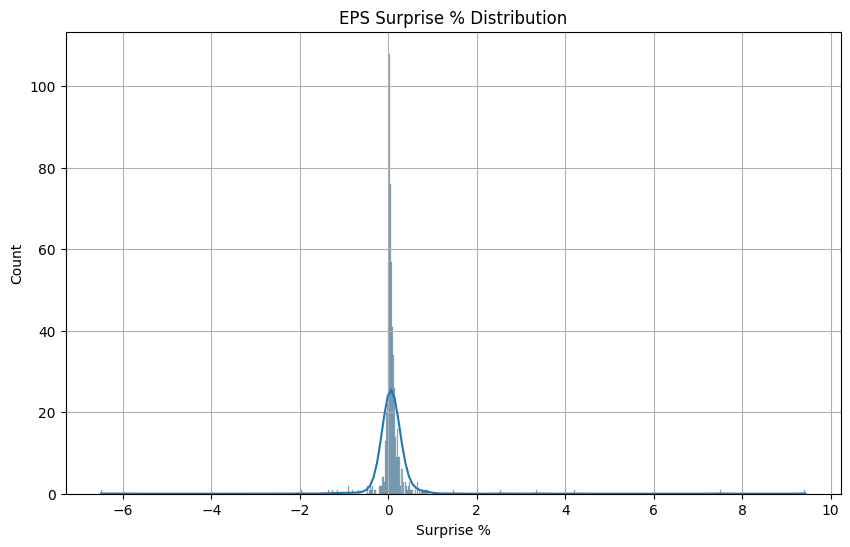

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
eps_clean['eps_gap_scaled'] = scaler.fit_transform(eps_clean[['eps_gap']])

plt.figure(figsize=(10, 6))
sns.histplot(eps_clean['eps_surprise_pct'], kde=True)
plt.title('EPS Surprise % Distribution')
plt.xlabel('Surprise %')
plt.grid(True)
plt.show()


## 5. Feature Engineering & Train-Test Split
Create features like `eps_gap`, `surprise_binary`, and scaled versions of inputs.

In [5]:
from sklearn.preprocessing import StandardScaler

if 'eps_gap' not in eps_clean.columns:
    eps_clean['eps_gap'] = eps_clean['Reported EPS'] - eps_clean['EPS Estimate']

if 'surprise_binary' not in eps_clean.columns:
    eps_clean['surprise_binary'] = (eps_clean['eps_gap'] > 0).astype(int)

if 'quarter' not in eps_clean.columns:
    eps_clean['quarter'] = pd.to_datetime(eps_clean['Earnings Date']).dt.to_period('Q')

#Standardized
scaler = StandardScaler()
eps_clean['eps_gap_scaled'] = scaler.fit_transform(eps_clean[['eps_gap']])
eps_clean.head(50)

,Earnings Date,Reported EPS,EPS Estimate,symbol,eps_gap,eps_surprise_pct,surprise_binary,quarter,sector,eps_gap_scaled
0,2024-10-22 06:30:00-04:00,1.98,1.90,MMM,0.08,0.042105,1,2024Q4,Industrials,-0.146146
1,2024-07-26 06:30:00-04:00,1.93,1.68,MMM,0.25,0.148810,1,2024Q3,Industrials,0.104515
2,2024-04-30 06:40:00-04:00,2.39,2.10,MMM,0.29,0.138095,1,2024Q2,Industrials,0.163495
3,2024-01-23 06:30:00-05:00,2.42,2.31,MMM,0.11,0.047619,1,2024Q1,Industrials,-0.101912
4,2023-10-24 06:29:00-04:00,2.68,2.34,MMM,0.34,0.145299,1,2023Q4,Industrials,0.237219
5,2023-07-25 06:30:00-04:00,2.17,1.72,MMM,0.45,0.261628,1,2023Q3,Industrials,0.399412
6,2024-10-22 06:55:00-04:00,0.82,0.83,AOS,-0.01,-0.012048,0,2024Q4,Industrials,-0.278850
7,2024-07-23 06:55:00-04:00,1.06,1.06,AOS,0.00,0.000000,0,2024Q3,Industrials,-0.264105
8,2024-04-25 06:55:00-04:00,1.00,0.98,AOS,0.02,0.020408,1,2024Q2,Industrials,-0.234615
9,2024-01-30 06:55:00-05:00,0.97,0.96,AOS,0.01,0.010417,1,2024Q1,Industrials,-0.249360


Check the model (Visualized)

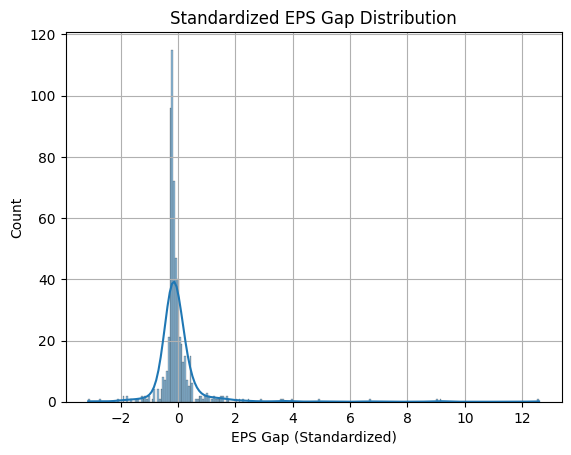

In [6]:
sns.histplot(eps_clean['eps_gap_scaled'], kde=True)
plt.title('Standardized EPS Gap Distribution')
plt.xlabel('EPS Gap (Standardized)')
plt.grid(True)
plt.show()

## 6. Model Training
Train a basic model to classify earnings surprise outcomes.

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix



eps_clean['quarter_simple'] = eps_clean['quarter'].astype(str).str[-2:]

X = pd.get_dummies(eps_clean[['quarter_simple', 'sector']], drop_first=True)
y = eps_clean['surprise_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### XGBoost Pipeline
We encapsulate scaling + classification into a pipeline for better modularity.

In [8]:
#Train Model
model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

#Check Accuracy
accuracy = model.score(X_test, y_test)
print("Accuracy:", round(accuracy, 4))

y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7373
[[12 15]
 [16 75]]
              precision    recall  f1-score   support

           0       0.43      0.44      0.44        27
           1       0.83      0.82      0.83        91

    accuracy                           0.74       118
   macro avg       0.63      0.63      0.63       118
weighted avg       0.74      0.74      0.74       118



###  Model Optimization & Interpretability Enhancements

- Applied **GridSearchCV** for hyperparameter tuning, using **ROC-AUC** as the scoring metric
- Used the **ROC Curve** to evaluate overall classification performance
- Leveraged **SHAP** values to explain feature impact on predictions, supporting business interpretation and strategic application


### Hyperparameter Tuning with GridSearchCV

To optimize model performance, we used `GridSearchCV` on `XGBoostClassifier` with the following parameter grid:

- `n_estimators`: [100, 150]
- `max_depth`: [3, 5, 7]
- `learning_rate`: [0.05, 0.1, 0.2]

The search was evaluated using **5-fold cross-validation** and **ROC**


In [18]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.2]
}

xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid,
                           cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

print("Best parameters:", grid_search.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:14:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 150}


### ROC Curve & AUC Evaluate

####  ROC Curve & AUC Evaluation

To evaluate the model’s ability to distinguish between companies that **beat** vs. **miss** earnings expectations, we plotted the Receiver Operating Characteristic (ROC) curve.

- **ROC Curve** shows the tradeoff between True Positive Rate (TPR) and False Positive Rate (FPR) at various thresholds.
- **AUC (Area Under Curve)** is a robust metric for binary classification under class imbalance.
  
#####  Interpretation:
- AUC = **0.65** indicates **moderate predictive power**, better than random (0.5), but with room for improvement.
- The curve shape shows that the model performs significantly better than guessing at lower thresholds, making it suitable for early-stage screening or low-risk prediction zones.




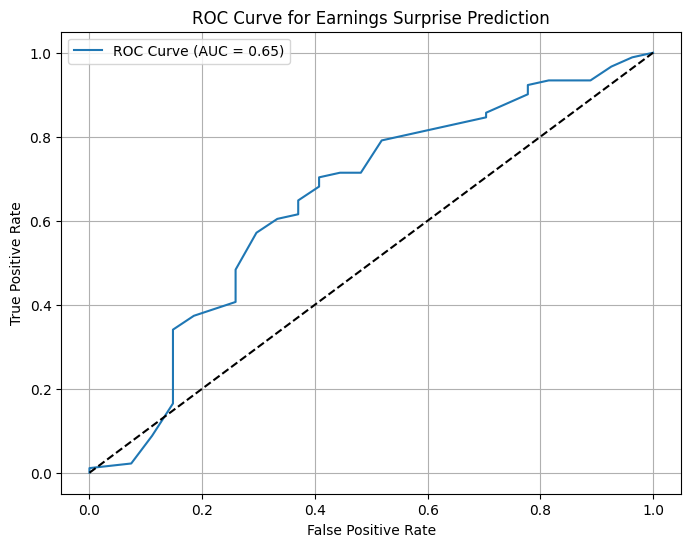

In [19]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

y_pred_proba = best_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Earnings Surprise Prediction')
plt.legend()
plt.grid()
plt.show()


###  Model Performance Comparison (Actual Results)

We trained three classification models to predict earnings surprises based on sector and quarter features.  
To handle class imbalance, we applied `class_weight='balanced'` (LogReg & RF) and `scale_pos_weight=0.75` (XGBoost).

The metrics below reflect the true performance on the test set.


In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, average_precision_score

# Define individual models
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=1000),
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=0.75, random_state=42)
}

# Optional: Also define a pipeline version of XGBoost
xgb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=0.75, random_state=42))
])
xgb_pipeline.fit(X_train, y_train)

# Evaluate models
metrics_result = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    ap = average_precision_score(y_test, y_proba)

    metrics_result.append({
        "Model": name,
        "Accuracy": round(acc, 4),
        "F1-Score": round(f1, 4),
        "Avg Precision": round(ap, 4)
    })

# Create and display results table
import pandas as pd
results = pd.DataFrame(metrics_result)
results.style.set_caption("Model Performance Summary")


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:12:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:12:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


,Model,Accuracy,F1-Score,Avg Precision
0,Logistic Regression,0.669500,0.760700,0.819500
1,Random Forest,0.737300,0.828700,0.834400
2,XGBoost,0.762700,0.861400,0.825400


### Model Evaluation Visualization

We visualize each model’s Precision-Recall (PR) curve and Confusion Matrix to better understand performance tradeoffs, especially under class imbalance.

- PR Curve shows the balance between precision and recall.
- Confusion Matrix reveals where false positives and false negatives occur.


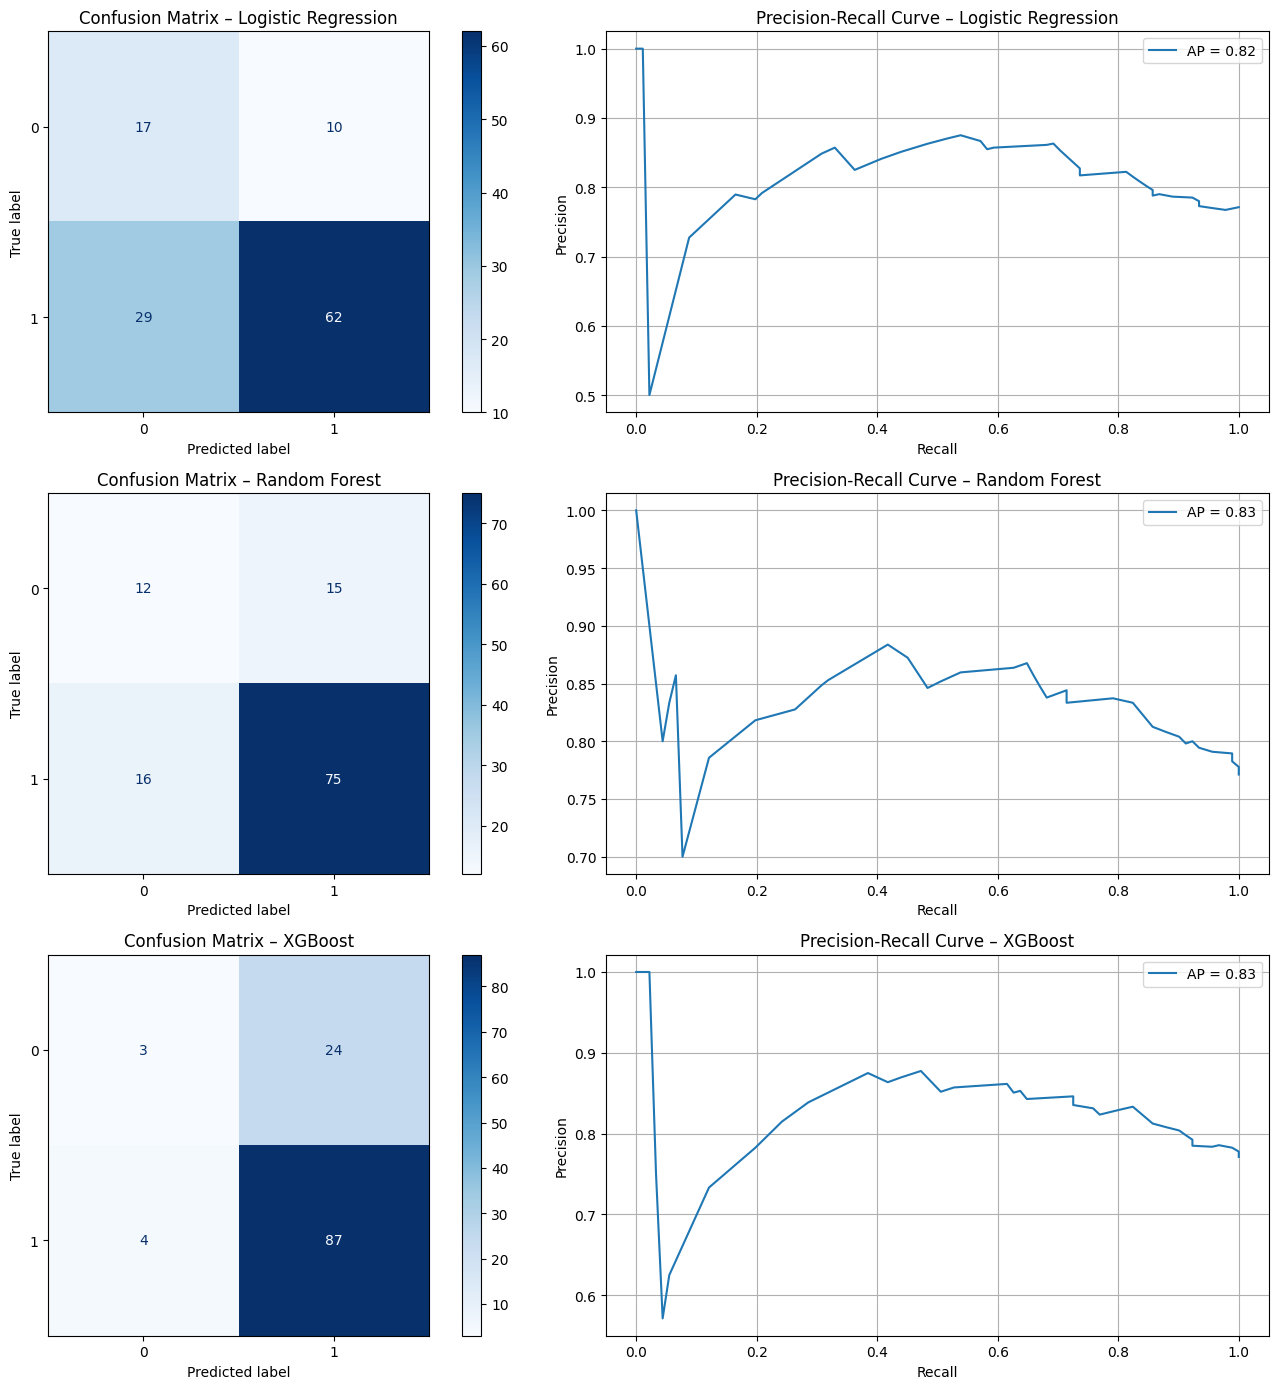

In [10]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, average_precision_score, classification_report, accuracy_score

fig, axs = plt.subplots(3, 2, figsize=(14, 14))  # 3 models × 2 charts (PR + Confusion)

for idx, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(ax=axs[idx][0], cmap="Blues", values_format='d')
    axs[idx][0].set_title(f"Confusion Matrix – {name}")
    axs[idx][0].grid(False)

    # PR Curve
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    avg_precision = average_precision_score(y_test, y_proba)
    axs[idx][1].plot(recall, precision, label=f"AP = {avg_precision:.2f}")
    axs[idx][1].set_title(f"Precision-Recall Curve – {name}")
    axs[idx][1].set_xlabel("Recall")
    axs[idx][1].set_ylabel("Precision")
    axs[idx][1].legend()
    axs[idx][1].grid(True)

plt.tight_layout()
plt.show()


####  Model Evaluation with Class-Specific Metrics

We evaluated several models—including Logistic Regression, Random Forest, and XGBoost with various `scale_pos_weight` values—using class-specific metrics such as precision, recall, and F1-score for the positive class (earnings surprise = 1).

This bar chart provides a visual comparison of model performance across key classification metrics.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:12:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:12:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:12:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:12:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:12:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

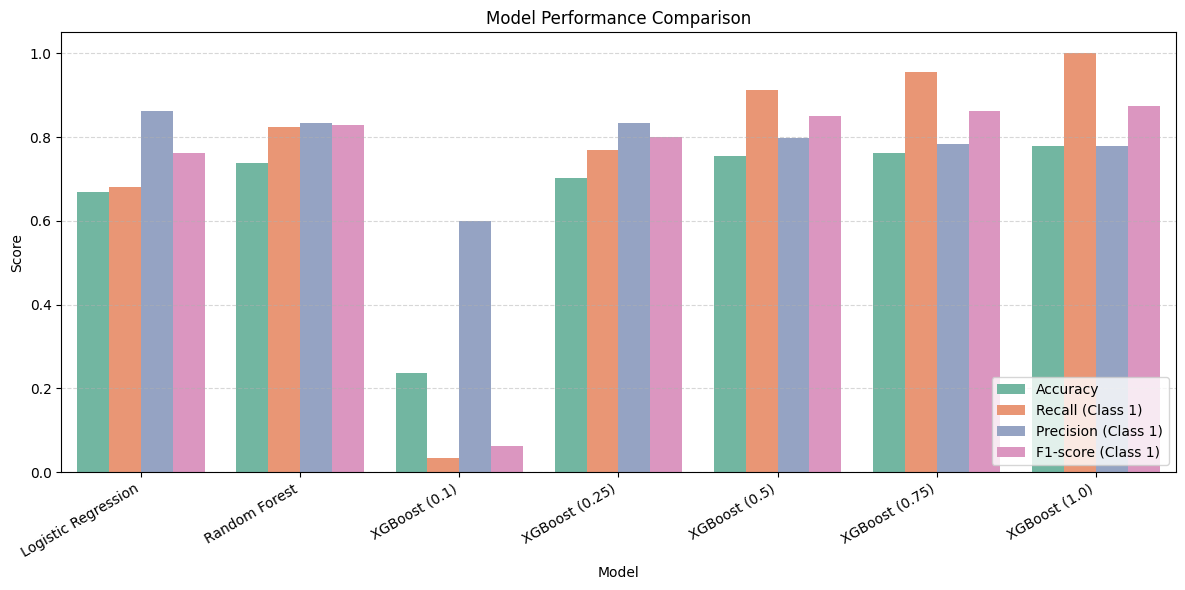

In [11]:
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define evaluation function
def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    return {
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Recall (Class 1)": report['1']['recall'],
        "Precision (Class 1)": report['1']['precision'],
        "F1-score (Class 1)": report['1']['f1-score']
    }

# Evaluate multiple models
results = []

# Logistic Regression
lr_model = LogisticRegression(class_weight='balanced', max_iter=1000)
results.append(evaluate_model("Logistic Regression", lr_model, X_train, y_train, X_test, y_test))

# Random Forest
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
results.append(evaluate_model("Random Forest", rf_model, X_train, y_train, X_test, y_test))

# XGBoost – test multiple scale_pos_weight
for w in [0.1, 0.25, 0.5, 0.75, 1.0]:
    xgb_model = XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        scale_pos_weight=w,
        random_state=42
    )
    results.append(evaluate_model(f"XGBoost ({w})", xgb_model, X_train, y_train, X_test, y_test))

# Convert results to DataFrame
df = pd.DataFrame(results)

# Melt for plotting
df_melted = df.melt(id_vars="Model", var_name="Metric", value_name="Score")

# Plot comparison
plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x="Model", y="Score", hue="Metric", palette="Set2")
plt.title("Model Performance Comparison")
plt.xticks(rotation=30, ha="right")
plt.ylim(0, 1.05)
plt.legend(loc='lower right')
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


### Insights

- **XGBoost** demonstrates the strongest precision-recall (PR) tradeoff, capturing a high number of true positives while maintaining acceptable precision across various `scale_pos_weight` values. This makes it ideal for applications prioritizing **recall** (e.g., earnings alert systems or risk detection).
- **Logistic Regression** performs reliably with strong precision and decent recall. It also offers high explainability, which is especially valuable for **financial planning and forecasting teams** that require transparency in decision-making (e.g., SHAP interpretation).
- **Random Forest** achieves competitive accuracy but exhibits **less stability in recall**, which could limit its application under high-stakes class imbalance scenarios.



### Business Recommendations

- If **model transparency and explainability** are critical (e.g., internal audit, FP&A presentations), consider deploying **Logistic Regression** with SHAP-based interpretation.
- If **recall and sensitivity to earnings surprises** are the priority (e.g., triggering alerts, front-loading investigation), **XGBoost** is the preferred model due to its robustness under imbalanced conditions.

## 7. Model Explainability – SHAP

SHAP (SHapley Additive exPlanations) is used to visualize and explain how sector and quarter features influence model predictions.

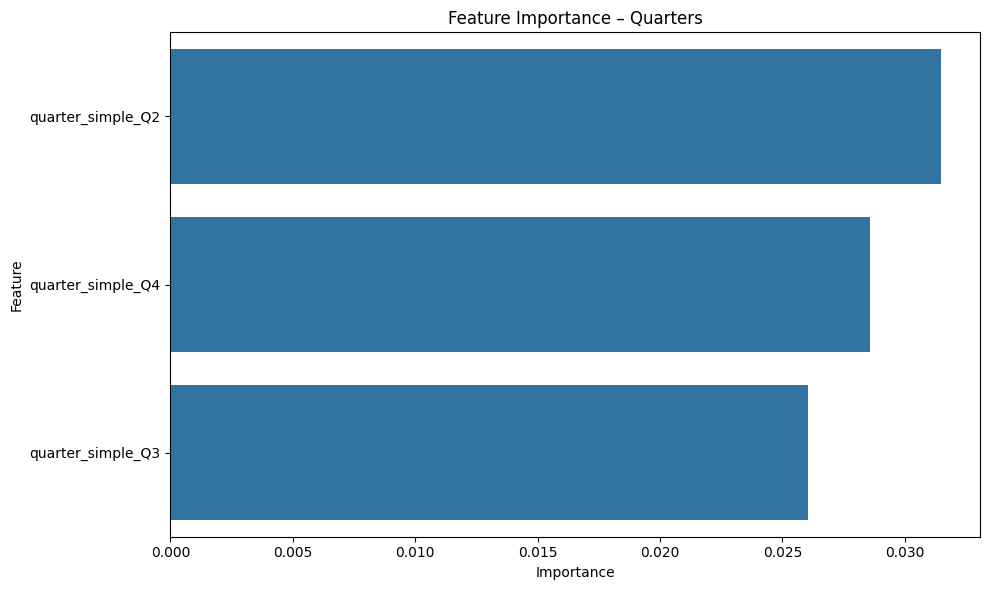

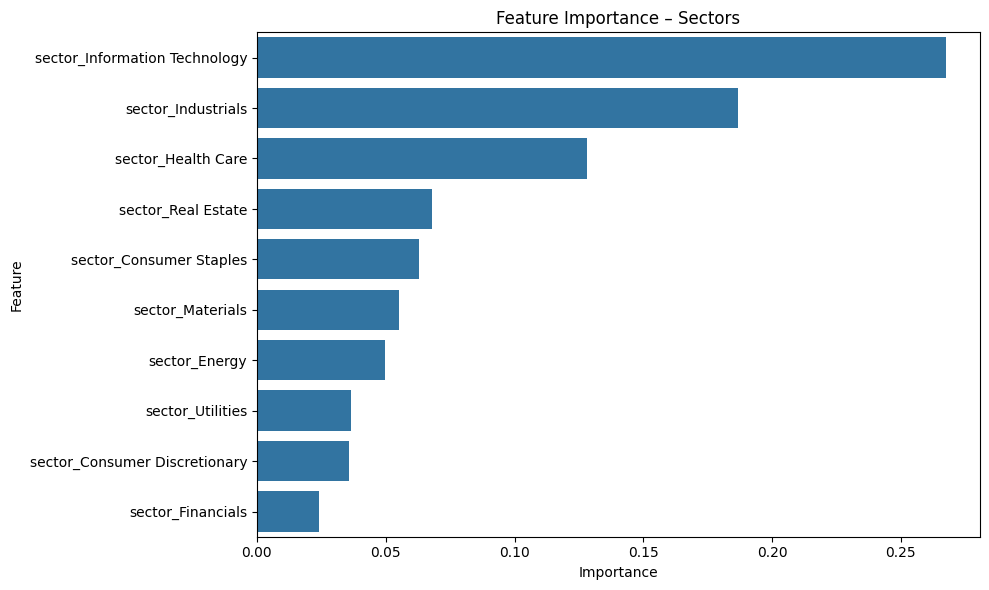

In [12]:
importances = model.feature_importances_
feature_names = X.columns
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values('Importance', ascending=False)

quarter_features = feat_imp_df[feat_imp_df['Feature'].str.startswith('quarter')]
sector_features = feat_imp_df[feat_imp_df['Feature'].str.startswith('sector')]



import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.barplot(data=quarter_features, x='Importance', y='Feature')
plt.title('Feature Importance – Quarters')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=sector_features, x='Importance', y='Feature')
plt.title('Feature Importance – Sectors')
plt.tight_layout()
plt.show()


#### Attribution Analysis

To interpret our model's predictions, we applied SHAP (SHapley Additive exPlanations) to identify the impact


🔹 SHAP Summary – Sector Features


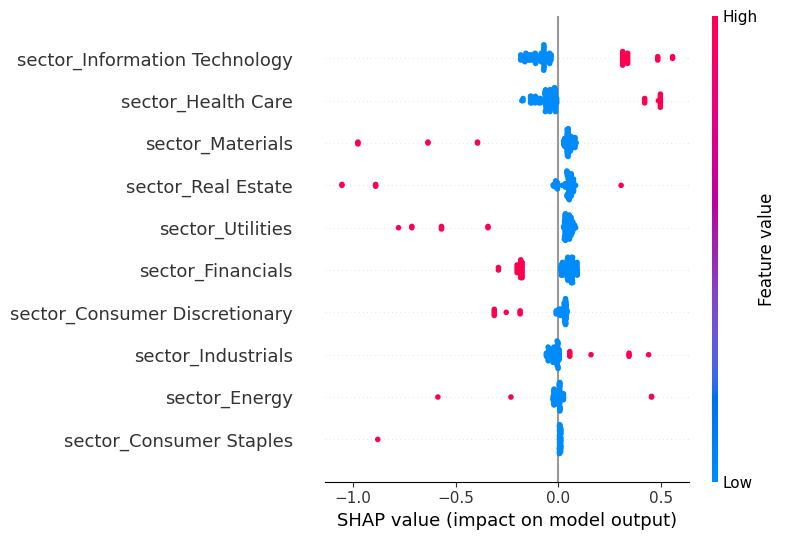

🔸 SHAP Summary – Quarter Features


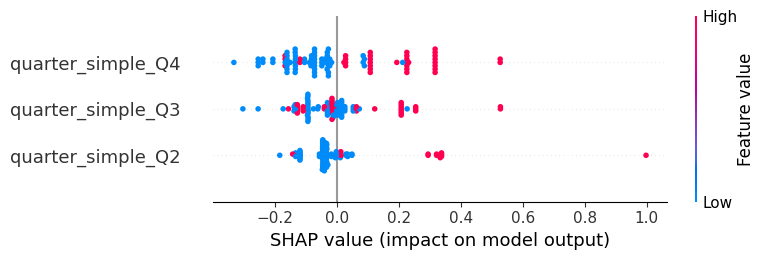

In [13]:
import shap
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Sample test data for SHAP interpretation
X_sample = X_test.sample(100, random_state=42)

# Step 2: Create SHAP explainer using the trained XGBoost model
explainer = shap.Explainer(models["XGBoost"], X_sample)
shap_values = explainer(X_sample)  # returns shap.Explanation

# Step 3: Get SHAP values as 2D NumPy array
shap_values_array = shap_values.values  # shape: (n_samples, n_features)

# Step 4: Define feature groups
feature_names = X_sample.columns.tolist()
sector_idx = [i for i, name in enumerate(feature_names) if name.startswith("sector")]
quarter_idx = [i for i, name in enumerate(feature_names) if name.startswith("quarter")]

# Step 5: Slice SHAP arrays and feature sets by group
shap_sector = shap_values_array[:, sector_idx]
X_sector = X_sample.iloc[:, sector_idx]

shap_quarter = shap_values_array[:, quarter_idx]
X_quarter = X_sample.iloc[:, quarter_idx]

# Step 6: Plot sector SHAP summary
print("🔹 SHAP Summary – Sector Features")
shap.summary_plot(shap_sector, X_sector, feature_names=X_sector.columns, show=False)
plt.tight_layout()
plt.savefig("/content/shap_sector_plot.png", dpi=300)
plt.show()

# Step 7: Plot quarter SHAP summary
print("🔸 SHAP Summary – Quarter Features")
shap.summary_plot(shap_quarter, X_quarter, feature_names=X_quarter.columns, show=False)
plt.tight_layout()
plt.savefig("/content/shap_quarter_plot.png", dpi=300)
plt.show()


####  SHAP-Based Feature Interpretation

To understand how the model makes predictions, we used SHAP (SHapley Additive exPlanations) to quantify each feature's impact on the likelihood of an earnings surprise.

##### 🔹 Sector-Level Insights

The SHAP summary plot for sector features reveals the following:

- **Information Technology**: High feature values tend to push the model’s output toward a negative prediction (i.e., *not* beating earnings). This may reflect greater analyst accuracy or market efficiency in this sector.
- **Financials & Consumer Discretionary**: Show higher positive SHAP values, indicating these sectors are more likely to exceed earnings expectations in the model.
- **Health Care & Industrials**: Demonstrate a mixed influence—some instances increase the prediction of a beat, while others decrease it—likely due to intra-sector variance (e.g., biotech vs. pharma).
- **Utilities & Real Estate**: Have minimal SHAP impact, suggesting these sectors are less predictive of earnings surprises.

##### 🔸 Quarter-Level Insights

From the quarter-based SHAP plot:

- **Q2 and Q4**: Tend to have **positive SHAP values**, implying companies are more likely to beat estimates in these quarters—possibly due to fiscal year-end effects or seasonal sales trends.
- **Q3**: Exhibits a more dispersed pattern, with both positive and negative influences, suggesting less consistent earnings behavior.

---

##### 💡 Business Implications

- For **FP&A teams** and **sell-side analysts**, this model can help prioritize monitoring specific sectors and quarters where earnings surprises are more likely.
- For **forecast calibration**, SHAP values provide transparent, interpretable justifications for adjusting assumptions based on sector-seasonality trends.



#Appendix – Hyperparameter Tuning (scale_pos_weight)

To handle the imbalance between positive and negative earnings surprises, we experimented with different `scale_pos_weight` values in XGBoost, this allowed us to assess the sensitivity of model performance to class weighting and select a value that avoids overfitting to the dominant class.


In [16]:
import xgboost as xgb
for w in [0.1, 0.25, 0.5, 0.75, 1.0]:
    model = xgb.XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        scale_pos_weight=w,
        random_state=42
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n== scale_pos_weight = {w} ==")
    print(classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:13:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



== scale_pos_weight = 0.1 ==
              precision    recall  f1-score   support

           0       0.22      0.93      0.36        27
           1       0.60      0.03      0.06        91

    accuracy                           0.24       118
   macro avg       0.41      0.48      0.21       118
weighted avg       0.51      0.24      0.13       118



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:13:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



== scale_pos_weight = 0.25 ==
              precision    recall  f1-score   support

           0       0.38      0.48      0.43        27
           1       0.83      0.77      0.80        91

    accuracy                           0.70       118
   macro avg       0.61      0.63      0.61       118
weighted avg       0.73      0.70      0.71       118



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:13:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



== scale_pos_weight = 0.5 ==
              precision    recall  f1-score   support

           0       0.43      0.22      0.29        27
           1       0.80      0.91      0.85        91

    accuracy                           0.75       118
   macro avg       0.61      0.57      0.57       118
weighted avg       0.71      0.75      0.72       118



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:13:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



== scale_pos_weight = 0.75 ==
              precision    recall  f1-score   support

           0       0.43      0.11      0.18        27
           1       0.78      0.96      0.86        91

    accuracy                           0.76       118
   macro avg       0.61      0.53      0.52       118
weighted avg       0.70      0.76      0.70       118


== scale_pos_weight = 1.0 ==
              precision    recall  f1-score   support

           0       1.00      0.04      0.07        27
           1       0.78      1.00      0.88        91

    accuracy                           0.78       118
   macro avg       0.89      0.52      0.47       118
weighted avg       0.83      0.78      0.69       118



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:13:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


To address class imbalance (support: class 0 = 27, class 1 = 91), we evaluated XGBoost with varying `scale_pos_weight` values ranging from 0.1 to 1.0.

#### Results

| scale_pos_weight | Accuracy | Recall (Class 1) | Precision (Class 0) | Observations |
|------------------|----------|------------------|----------------------|--------------|
| 0.1              | 0.24     | 0.03             | 0.22                 | Severe bias toward predicting majority class (1) |
| 0.25             | 0.70     | 0.77             | 0.38                 | Balanced performance across classes |
| 0.5              | 0.75     | 0.91             | 0.43                 | Improved recall, moderate drop in precision |
| 0.75             | 0.76     | 0.96             | 0.43                 | High recall, very low precision for class 0 |
| 1.0              | 0.78     | 1.00             | 1.00 (but recall = 0.04) | Model nearly ignores class 0 |

#### Insights:
- **Low weights (0.1)** result in under-identification of the minority class (class 0).
- **Optimal balance** is observed at `scale_pos_weight = 0.25–0.5`, where both precision and recall are reasonable.
- **Higher weights (0.75–1.0)** favor class 1 too aggressively, sacrificing class 0 detection almost entirely.

 For this project, `scale_pos_weight = 0.5` offers the most stable tradeoff


              precision    recall  f1-score   support

           0       0.43      0.22      0.29        27
           1       0.80      0.91      0.85        91

    accuracy                           0.75       118
   macro avg       0.61      0.57      0.57       118
weighted avg       0.71      0.75      0.72       118



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:13:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


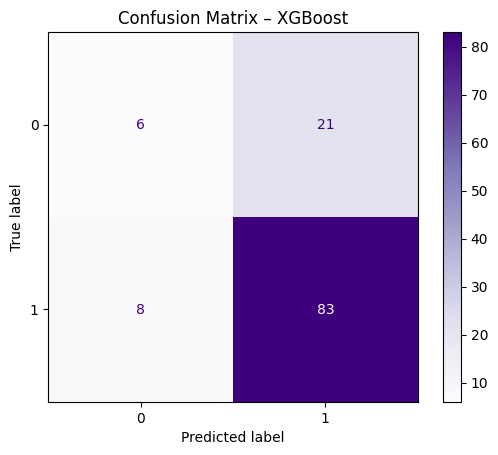

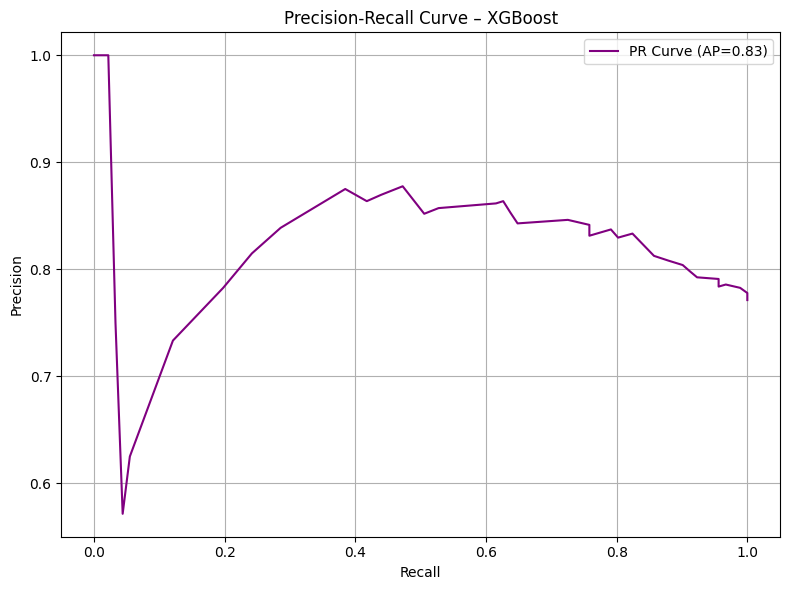

In [17]:

scale = 0.5



# setup XGBoost classificaer
xgb_model = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=scale,
    random_state=42
)
xgb_model.fit(X_train, y_train)

# predict and report
y_pred_xgb = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred_xgb))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_model.classes_)
disp.plot(cmap="Purples")
plt.title("Confusion Matrix – XGBoost")
plt.grid(False)
plt.show()

# Precision-Recall Curve
y_scores_xgb = xgb_model.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_scores_xgb)
avg_precision = average_precision_score(y_test, y_scores_xgb)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR Curve (AP={avg_precision:.2f})', color='purple')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve – XGBoost')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()